# Processor to crop and register multiplane data
* input:
  *  path: path to 3D or 4D stack in tiff format
  *  calpath: path to calibration file
  *    
* output:
  *  4D stack, order
  *  calibration file
  *  processing log file


In [1]:
from multiplane import MultiplaneProcess
# Initialize the MultiplaneProcess class

In [2]:
proc = MultiplaneProcess()# choose path via gui or direct input  
proc.select_data_directory()

'D:/moritz/Technical_paper/4x2/20250825_beads_splitting_eff/PS4c_e561nm_dz50nm_4x2Scopt_1'

In [3]:
# get metadata if present
proc.get_files_with_metadata()
proc.get_metadata()
proc.update_metadata()

Updated zstage displacement per frame to: 50.0 nm
Updated global ROI to:  [1075, 1650, 2000, 460]
Updated pixelsize to:  108.0


In [4]:
proc.P['nplanes']= 8
#proc.P['order_default']= [3,2,1,0,4,5,6,7] 
proc.P['use_projection'] = 'min' #'median' 
proc.th_weights = (5,1)# was (4,1) 
proc.i_corr = False # do not apply intensity correction
proc.P['padding'] = -60 
proc.P["apply_transform"]= False
proc.deskew_cam = False

In [5]:
# activate logging
proc.set_logging(True)

Read image PS4c_e561nm_dz50nm_4x2Scopt_1_MMStack_Pos0.ome.tif; size (402, 460, 2000); type uint16
Using global ROI [1075, 1650, 2000, 460] from parameters, might be erroneous due to missing metadata
Using global ROI [1075, 1650, 2000, 460] from parameters, might be erroneous due to missing metadata
Adaptive thresholding cam 0..


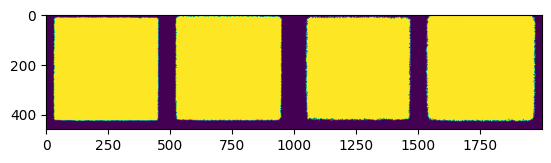

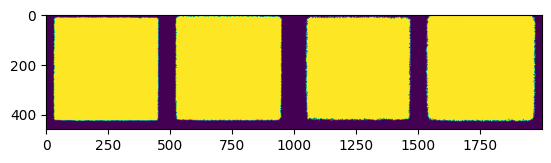

Adaptive thresholding cam 1..


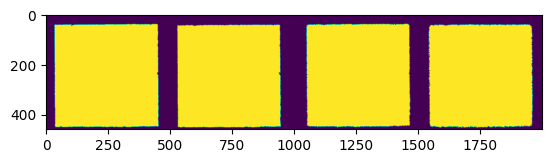

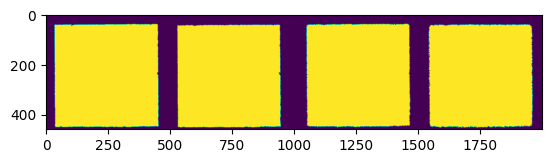

FOV size consolidation: 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


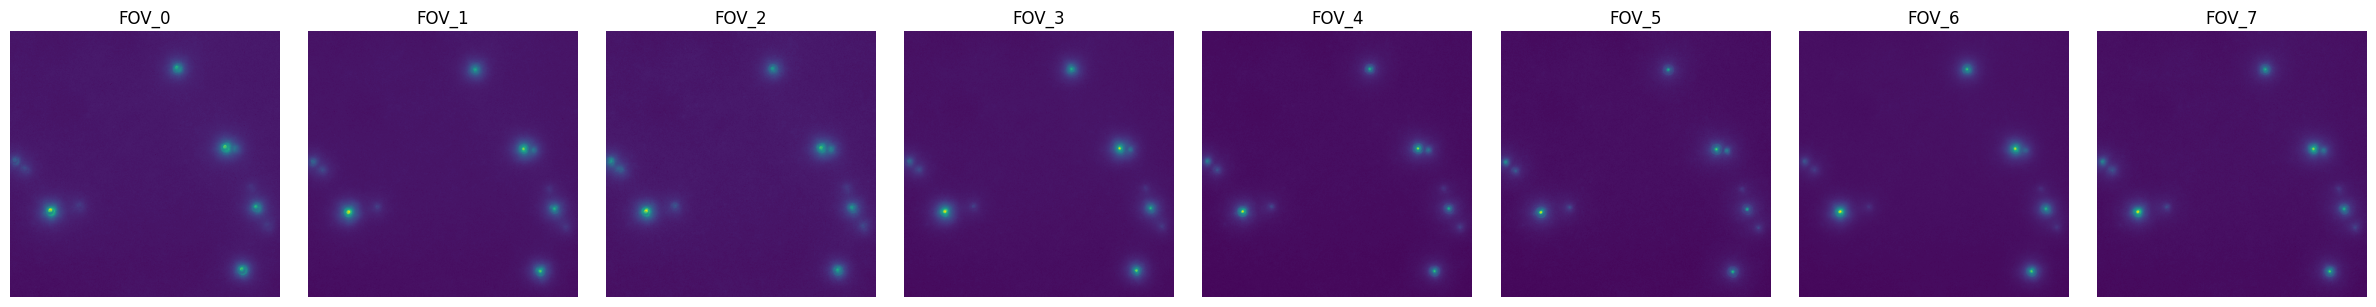

Updated zstage displacement per frame to: 50.0 nm
Updated global ROI to:  [1075, 1650, 2000, 460]
Updated pixelsize to:  108.0
Estimating interplane distance..


SR-localising peaks:  25%|██▌       | 2/8 [00:00<00:00,  7.80it/s]

Skipped 0 / 2010 (0.00%) peaks in fitting due to irregular shape.
Skipped 0 / 2010 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks:  50%|█████     | 4/8 [00:00<00:00,  7.85it/s]

Skipped 0 / 2010 (0.00%) peaks in fitting due to irregular shape.
Skipped 0 / 2010 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks:  75%|███████▌  | 6/8 [00:00<00:00,  7.91it/s]

Skipped 0 / 2010 (0.00%) peaks in fitting due to irregular shape.
Skipped 0 / 2010 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks: 100%|██████████| 8/8 [00:01<00:00,  7.94it/s]

Skipped 0 / 2010 (0.00%) peaks in fitting due to irregular shape.
Skipped 0 / 2010 (0.00%) peaks in fitting due to irregular shape.


Convert datastructure: 100%|██████████| 8/8 [00:00<00:00, 95.18it/s]


Determining relative z-distances and order
{'dz': [727.0423978891121, 758.0619853060334, 738.1423392101333, 422.53819696529786, 936.4590713002194, 727.1289399356732, 729.980045079165], 'labels': ['1-0', '2-1', '3-2', '4-3', '5-4', '6-5', '7-6'], 'fp': [59, 74, 89, 104, 112, 131, 146, 160]}
Finished writing D:/moritz/Technical_paper/4x2/20250825_beads_splitting_eff/PS4c_e561nm_dz50nm_4x2Scopt_1\cal_data\interplane_distance.svg
Finished writing D:/moritz/Technical_paper/4x2/20250825_beads_splitting_eff/PS4c_e561nm_dz50nm_4x2Scopt_1\cal_data\interplane_distance.png
Using order [0 2 1 3 6 7 4 5]
Using quad based transformation estimation, whole quad combination sampling


Finding markers:   0%|          | 0/8 [00:00<?, ?it/s]

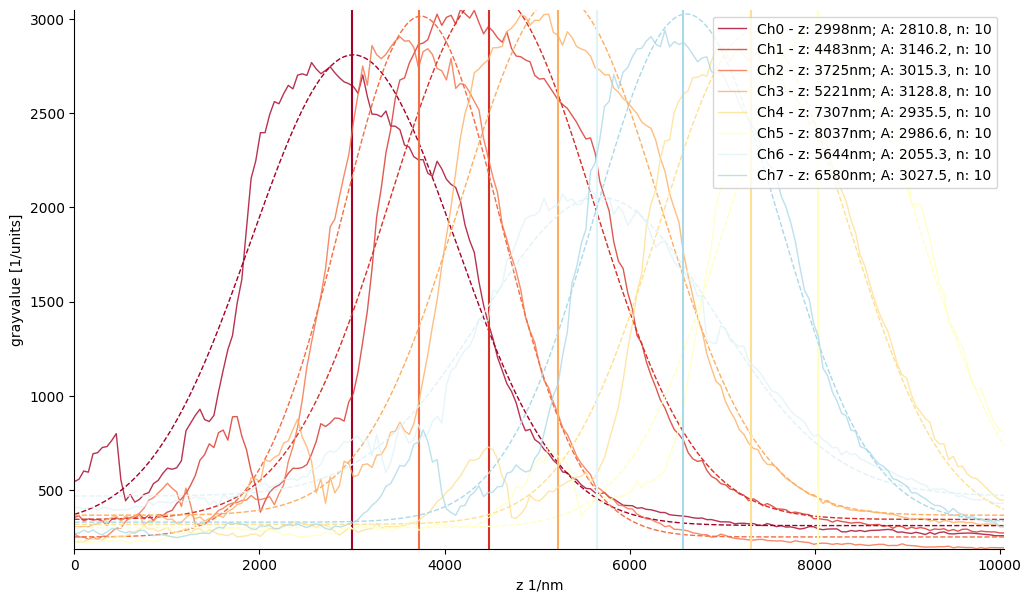

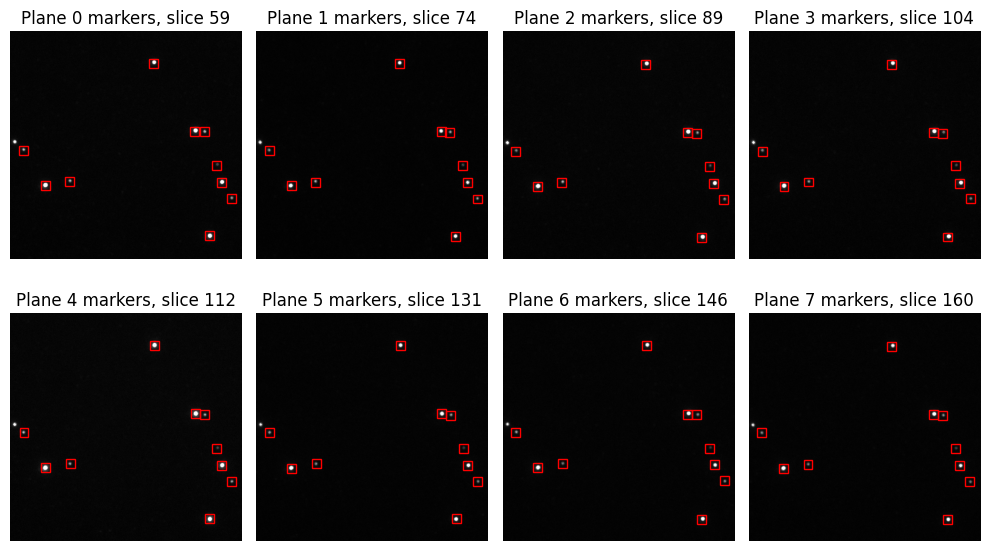

Finding markers: 100%|██████████| 8/8 [00:00<00:00,  8.48it/s]


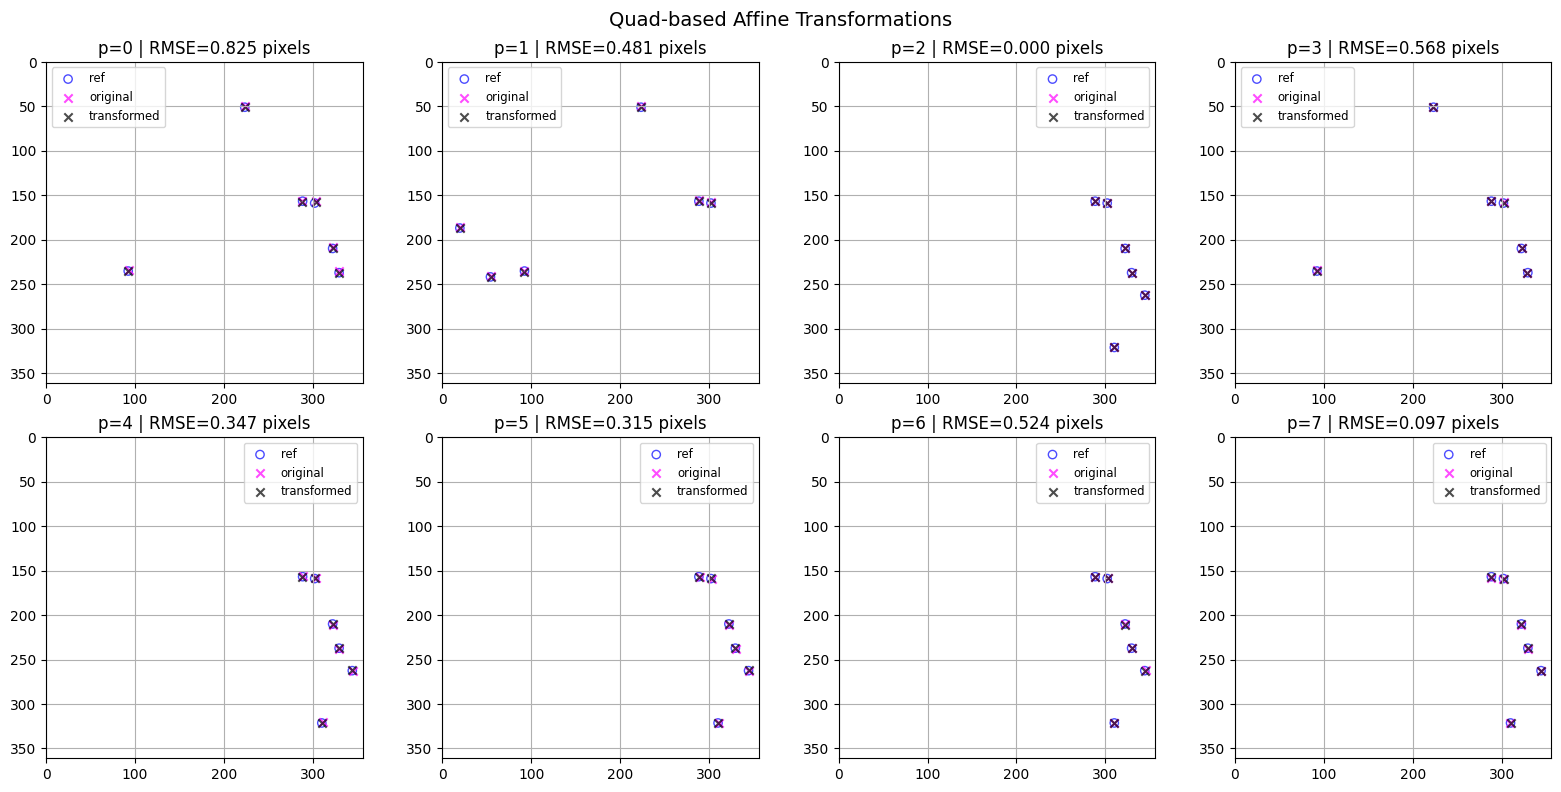

Query quads, estimate transform: 100%|██████████| 8/8 [00:01<00:00,  4.60it/s]

Checking magnification variance between planes...
Nothing to restructure in transform 0, skipping...
Nothing to restructure in transform 1, skipping...
Nothing to restructure in transform 2, skipping...
Nothing to restructure in transform 3, skipping...
Nothing to restructure in transform 4, skipping...
Nothing to restructure in transform 5, skipping...
Nothing to restructure in transform 6, skipping...
Nothing to restructure in transform 7, skipping...
Registration of data...


Processing parameters written to file
Finished writing marker plane 0
Finished writing marker plane 1
Finished writing marker plane 2
Finished writing marker plane 3
Finished writing marker plane 4
Finished writing marker plane 5
Finished writing marker plane 6
Finished writing marker plane 7


{'steps': 201,
 'dz_stage': 50.0,
 'pxlsize': 108.0,
 'ncams': 2,
 'fname': 'PS4c_e561nm_dz50nm_4x2Scopt_1_MMStack_Pos0.ome.tif',
 'global_roi': {0: [1075, 1650, 2000, 460], 1: [1075, 1650, 2000, 460]},
 'fovs': {0: {0: [37, 1572, 393, 1933],
   1: [38, 556, 394, 917],
   2: [40, 1079, 396, 1440],
   3: [42, 62, 398, 423]},
  1: {0: [68, 1079, 424, 1440],
   1: [69, 1572, 425, 1933],
   2: [68, 64, 424, 425],
   3: [70, 558, 426, 919]}},
 'deg': {0: 0, 1: 0},
 'dz': [727.0423978891121,
  758.0619853060334,
  738.1423392101333,
  422.53819696529786,
  936.4590713002194,
  727.1289399356732,
  729.980045079165],
 'order': array([0, 2, 1, 3, 6, 7, 4, 5], dtype=int64),
 'labels': ['1-0', '2-1', '3-2', '4-3', '5-4', '6-5', '7-6'],
 'fp': [59, 74, 89, 104, 112, 131, 146, 160],
 'brightness': {0: 0.8071720179854773,
  1: 0.5900506804455887,
  2: 0.7928267064308341,
  3: 0.7818162349653373,
  4: 1.0,
  5: 0.6682036606919697,
  6: 0.678119476564365,
  7: 0.6709344513630455},
 'transform': {0: a

In [6]:
proc.calibrate(is_bead = True)

In [ ]:
proc.calibrate_sml()

In [6]:
proc.load_calibration()


No fields missing in calibration, proceeding


{'steps': 201,
 'dz_stage': 49.99999999999982,
 'pxlsize': 108.0,
 'ncams': 2,
 'fname': 'PS4c_e561nm_dz50nm_4x2Scopt_1_MMStack_Pos0.ome.tif',
 'global_roi': {0: [1075, 1650, 2000, 460], 1: [1075, 1650, 2000, 460]},
 'fovs': {0: {0: [37, 1572, 393, 1933],
   1: [38, 556, 394, 917],
   2: [40, 1079, 396, 1440],
   3: [42, 62, 398, 423]},
  1: {0: [68, 1079, 424, 1440],
   1: [69, 1572, 425, 1933],
   2: [68, 64, 424, 425],
   3: [70, 558, 426, 919]}},
 'deg': {0: 0, 1: 0},
 'dz': [727.0423978891095,
  758.0619853060307,
  738.1423392101307,
  422.5381969652964,
  936.459071300216,
  727.1289399356706,
  729.9800450791624],
 'order': [0, 2, 1, 3, 6, 7, 4, 5],
 'labels': ['1-0', '2-1', '3-2', '4-3', '5-4', '6-5', '7-6'],
 'fp': [59, 74, 89, 104, 112, 131, 146, 160],
 'brightness': {0: 0.8071720179854773,
  1: 0.5900506804455887,
  2: 0.7928267064308341,
  3: 0.7818162349653373,
  4: 1.0,
  5: 0.6682036606919697,
  6: 0.678119476564365,
  7: 0.6709344513630455},
 'transform': {0: [[1.00139

In [7]:
proc.save_individual = True
proc.save_in_subfolders = False # save each plane in a separate subfolder
proc.P['apply_transform'] = False
proc.P['dF_batch']= 1000#frames, framebatch_size default 
proc.execute()

Data Directory: D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1
No fields missing in calibration, proceeding
Rotating by skew angle...
Rotating by skew angle...
created folder:  D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]


Rotating by skew angle...
Rotating by skew angle...
Writing data to D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1\reg


Plane: 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

Finished processing D:/moritz/Technical_paper/4x2/20250902_PAINT/RH28_p3_cy3_cos7_tub_e561nm_f100k_1
